# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results
target_pos = np.array([2., 2., 10.,0.,0.,0.])    # target position for reward function

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w', newline='\n') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

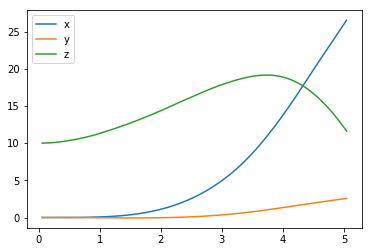

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

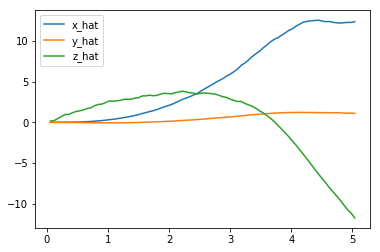

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

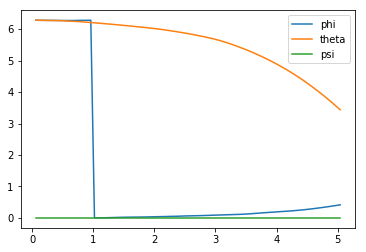

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

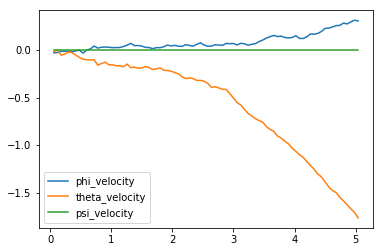

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

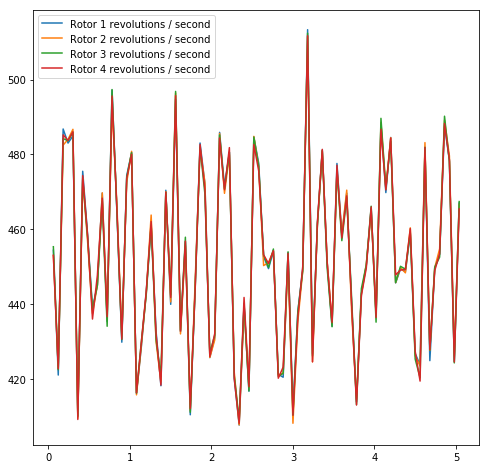

In [7]:
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 26.52277963   2.56707566  11.62794434   0.4157464    3.43823246   0.        ]
[ 12.36862056   1.09529392 -11.74523112]
[ 0.30538595 -1.76459894  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
#import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 100
target_pos = np.array([0., 0., 10., 0., 0., 0.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  100, score =  -0.057 (best =  -0.053), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task import Task
import numpy as np
from random import random

import tensorflow as tf

# Set seeds known to work well
np.random.seed(2180378941)
tf.set_random_seed(1137986626)

runtime = 10
num_episodes = 400

init_velocities = np.array([0., 0., 0.])
xyz_pose = [150., 150., 150.]

init_pose = np.array(xyz_pose + [0., 0., 0.])
init_angle_velocities = np.array([0., 0., 0.])
target_pos = np.array(xyz_pose + [0., 0., 0.])

task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = DDPG(task)
done = False
total_rewards = []
final_rewards = []
init_poses = []
target_poses = []
end_poses = []

for episode in range(1, num_episodes+1):
    state = agent.reset_episode()
    total_reward = 0
    init_poses.append(np.copy(agent.task.sim.init_pose))
    target_poses.append(np.copy(agent.task.target_pos))
    curr_pose = []
    for i in range(runtime):
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        curr_pose.append(task.sim.pose[:3].tolist())
        if i == runtime-1:
            print("\rEpisode = {:4d}, score = {:7.3f} total = {:7.3f} (best = {:7.3f})"\
                    .format(episode, agent.score, total_reward, agent.best_score)
                  , end="")
            sys.stdout.flush()
            total_rewards.append(total_reward)
            end_poses.append(curr_pose)
            final_rewards.append(reward)
            done = False
            break
        sys.stdout.flush()

Using TensorFlow backend.


Episode =  400, score =  -0.043 total =  -0.434 (best =  -0.037)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

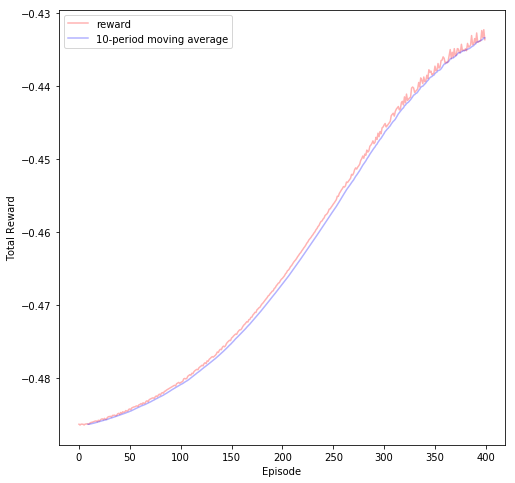

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_rewards(rewards, smooth_periods=None):
    
    def moving_average(data, periods):
        weights = np.ones(periods) / periods
        return np.convolve(data, weights, mode='valid')
    
    indices, rewards = np.arange(len(rewards)),  np.array(rewards)
    fig = plt.figure()
    fig.set_size_inches(8, 8)
    plt.plot(indices, rewards, color='red', alpha=0.3)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    
    if smooth_periods is not None:
        smoothed = moving_average(rewards, smooth_periods)
        plt.plot(indices[smooth_periods-1:], smoothed, color='blue', alpha=0.3)
        plt.legend(['reward', '%d-period moving average' % smooth_periods])
    plt.show()

plot_rewards(total_rewards, smooth_periods=10)

## Print the (x, y, z) positions for final episode

Let's print the (x, y, z) positions over the 10 time periods of the last episode.

In [12]:
print("Positions for the duration of the final episode")
end_poses[-1]

Positions for the duration of the final episode


[[149.9999999994115, 149.9994674179611, 150.01261343032348],
 [149.9999999913627, 149.98806676523637, 150.05039695536297],
 [149.99999996480906, 149.93869810090843, 150.1005919397646],
 [149.99999990899747, 149.83147262299758, 150.12236656334034],
 [149.99999981348415, 149.68838707260832, 150.06616868656792],
 [149.99999966790858, 149.56830419822367, 149.92569562324212],
 [149.9999994658759, 149.50063898394683, 149.75432782290264],
 [149.99999921910273, 149.44404433202476, 149.59489768733434],
 [149.99999895483808, 149.3422830001888, 149.4189454470659],
 [149.99999870364337, 149.21095375883138, 149.16742862176244]]

## Plot the flight path for final episode

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_flight_path(poses, idx, runtime=None, xlim=None, ylim=None, zlim=None):
    if not runtime:
        runtime = len(poses[idx])
    xs, ys, zs = zip(*poses[idx])
    xs = xs[:runtime]
    ys = ys[:runtime]
    zs = zs[:runtime]
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(xs, ys, zs=zs)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('flight path')
    if xlim is not None:
        ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])
    if zlim is not None:
        ax.set_zlim(zlim[0], zlim[1])

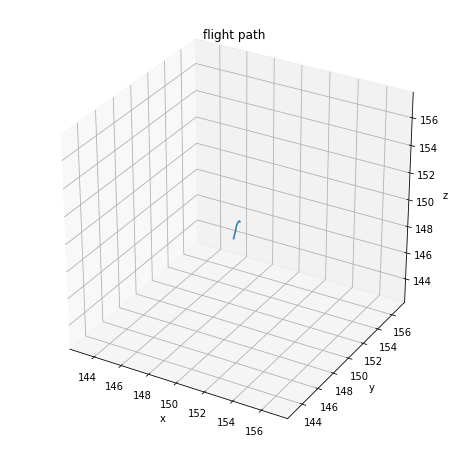

In [14]:
spread = 7.5
gen_range = lambda point, spread: (point-spread, point+spread)

plot_flight_path(
    poses=end_poses, 
    idx=len(end_poses)-1, 
    runtime=runtime,
    xlim=gen_range(xyz_pose[0], spread),
    ylim=gen_range(xyz_pose[1], spread),
    zlim=gen_range(xyz_pose[2], spread)
)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I chose the hover task:

1. The agent starts with (x, y, z) positions of (150., 150., 150.). The reason for large (x, y, z) coordinates, especially for the high z value, is so that the agent learns quickly that it needs to maintain high enough rotor values so that it doesn't go into a free-fall. Being close to the ground, the reward might not be negative enough if the agent starts falling.

2. the reward function is based on maintaining the lowest possible Euclidean norm between the start coordinates and the end coordinates. 
```
        reward = sigmoid(np.linalg.norm(self.sim.pose[:3] - self.target_pos[:3]))
        reward = alpha * (0.5 - sigmoid(reward)) 
```
3. In order to prevent a wide variation in the reward, the range of the effect of the Euclidean norm is squashed by a sigmoid function. A zero Euclidean distance gives a reward of -0.5, while as the Euclidean norm grows towards infinity, the reward grows to -1.0. When we offset that upward by 0.5, we get a range from -0.5 to 0.0. Since the number of time periods per episode are set to 10 in this case, scaling the reward down by a factor of 0.1 will keep the total reward between -0.5 and 0.0.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I primarily tried the DDPG actor-critic method since it's a popular, modern aproach. Here I describe some tweaks to the sample DDPG code:

1. I tried adding dropout, batch normalization, changing the number of hidden nodes per layer, etc. That by itself did't have a big impact on the training process. Hence, I kept the architecture the same as in the default case.

2. For the Actor, the model consists of 3 dense layers with ReLU activation followed by a projection layer to the action tensor size, with a sigmoid activation function. The sigmoid normalization to [0, 1] is then used with a Keras Lambda layer to re-nromalize the actions to the expected action range:
```
        states = layers.Input(shape=(self.state_size,), name='states')

        net = layers.Dense(units=32, activation='relu')(states)
        net = layers.Dense(units=64, activation='relu')(net)
        net = layers.Dense(units=32, activation='relu')(net)

        raw_actions = layers.Dense(units=self.action_size, activation='sigmoid',
            name='raw_actions')(net)

        actions = layers.Lambda(lambda x: (x * self.action_range) + self.action_low,
            name='actions')(raw_actions)
```
3. The Critic includes a separate state and action neural nets, which are then combined to capture the joint state, and to produce the model output. 
```
        states = layers.Input(shape=(self.state_size,), name='states')
        actions = layers.Input(shape=(self.action_size,), name='actions')

        net_states = layers.Dense(units=32, activation='relu')(states)
        net_states = layers.Dense(units=64, activation='relu')(net_states)

        net_actions = layers.Dense(units=32, activation='relu')(actions)
        net_actions = layers.Dense(units=64, activation='relu')(net_actions)

        net = layers.Add()([net_states, net_actions])
        net = layers.Activation('relu')(net)
```
4. Even though Adam can be thought of a sort of "automatic" optimization algorithm (in the sense of being adaptive), the model did not do well with the default 1e-3 learning rate. When I reduced the learning rate to 1e-7, the model did much better. The Actor was more sensitive to the learning rate than the Critic, although I ultimately kept both learning rates low. Also, in case the gradient were to explode, I set the clipvalue parameter of the optimizer to 0.5. Since the learning rate was low and the rewards were normalized to a narrow range, this clipping likely didn't get triggered at all, but it did help when I was experimenting with a larger reward range and higher learning rates before settling on the current configuration.
5. An important issue to consider when designing the learning scenario was whether to discount or not. Since discounting would make later time periods matter less than the earlier ones, and the goal was for the quadcopter to hover for 10 time periods, I changed the discount factor to 1.0, meaning no discounting was applied. This made sure that the quadcopter would learn to be as stable in later time periods as in the early ones, which was the goal of the hover task.
6. I ended up tweaking the noise parameters quite a bit. My general finding was that more noise than what came with the default settings was preferable for this learning problem. Otherwise, there was too little exploration, and the agent wasn't learning well. Here are the final noise parameters:
 $\gamma$ = 1.0,
 $\tau$ = 0.01,
 $\mu$ = 0.1,
 $\theta$ = 0.5,
 $\sigma$ = 0.1.
7. I found that by far the most important setting to ensure an increasing reward over time was to pick good random seeds. Unfortunately, reinforcement learning problems are well-known for their high sensitivity to random seed selection, as compared to supervised learning problems such as image classification. [Here](https://www.alexirpan.com/2018/02/14/rl-hard.html) is a good post that elaborates on this issue quite a bit.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: See the rewards plot above. The model did ultimately learn, but as mentioned previously, it required a lot of tweaking of noise parameters, the learning rate, the reward function (especially its normalization), and the random seeds. 

The final total reward was about -0.43. This may not have been as great as I expected (range should have been [-0.5, 0.0], but the quadcopter did learn to hover. Note that when I starter tweaking the model, the z coordinate would drop extremely quickly, so that even after a few episodes it was very far below the value of 150. The last episode had the following results - the rows represent time, and the columns represent the (x, y, z) coordinates:
```
[[149.9999999994115, 149.9994674179611, 150.01261343032348],
 [149.9999999913627, 149.98806676523637, 150.05039695536297],
 [149.99999996480906, 149.93869810090843, 150.1005919397646],
 [149.99999990899747, 149.83147262299758, 150.12236656334034],
 [149.99999981348415, 149.68838707260832, 150.06616868656792],
 [149.99999966790858, 149.56830419822367, 149.92569562324212],
 [149.9999994658759, 149.50063898394683, 149.75432782290264],
 [149.99999921910273, 149.44404433202476, 149.59489768733434],
 [149.99999895483808, 149.3422830001888, 149.4189454470659],
 [149.99999870364337, 149.21095375883138, 149.16742862176244]]
```
Since all 3 coordinates were quite close after 10 time periods, that is evidence of the model having learned well, even though the reward could have perhaps been a bit better. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
Finding the reward function wasn't trivial. The main realization for the hover task that I had was not to discount future time periods, and to not check the "done" condition. Since the model would have been "done" after the first period (coordinates closest to starting values, i.e. smallest Euclidean norm), if I wanted to teach the quadcopter to hover, I needed to accumulate the reward over some fixed number of time periods when I would expect the quadcopter to hover. The other thing that was very bothersome was the sensitivity to random seeds, which as I mentioned is a [common problem](https://www.alexirpan.com/2018/02/14/rl-hard.html) with RL models.
was incorre